# This just shows the function for grabbing random example images

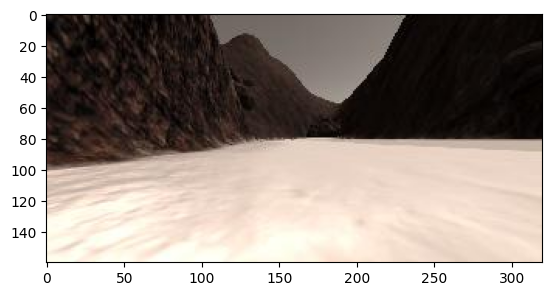

In [4]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2
path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])
plt.imshow(image)

# The next segment shows our image warping function

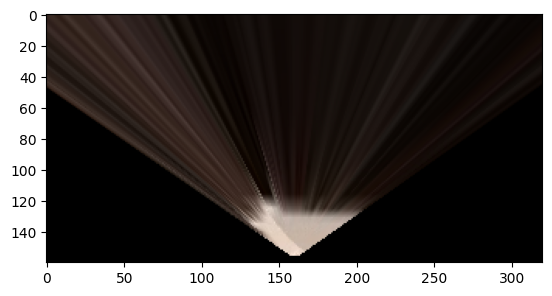

In [21]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2
path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])

# defining the perspective transform function to warp our image

def perspect_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped
#applying the image warp
dst_size = 3
bottom_offset = 5
source = np.float32([[14,140],
                    [300,140],
                    [200,95],
                    [120,95]])

destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset]])

warped = perspect_transform(image, source, destination)
plt.imshow(warped)

# 1 The next cell shows the threshhold output for extracting navigable terrain from the warpedd image
# 2 yellow represents the navigable terrain

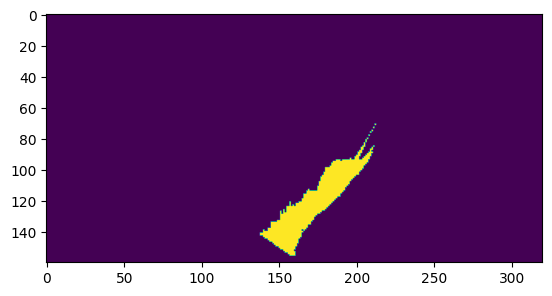

In [22]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2
path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])

# defining the perspective transform function to warp our image

def perspect_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped
#applying the image warp
dst_size = 3
bottom_offset = 5
source = np.float32([[14,140],
                    [300,140],
                    [200,95],
                    [120,95]])

destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset]])

warped = perspect_transform(image, source, destination)

#threshholding function for navigable terrain
def color_thresh(img, rgb_thresh=(160,160,160)):
    color_select = np.zeros_like(img[:,:,1])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) &(img[:,:,1] > rgb_thresh[1]) &(img[:,:,2] > rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select
plt.imshow(color_thresh(warped))

# 1 Same as before but this time we threshhold without warping
# 2 yellow represents the navigable terrain

Text(0.5, 1.0, 'threshholded')

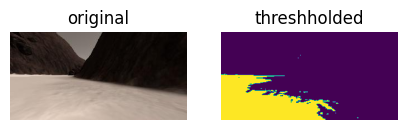

In [10]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2
path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])

fig = plt.figure(figsize= (5,5))

fig.add_subplot(2,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("original")
#extracting rock and grid sample photos
example_grid = '../calibration_images/example_grid1.jpg'
example_rock = "../calibration_images/example_rock1.jpg"
grid_img = mpimg.imread(example_grid)
rock_img = mpimg.imread(example_rock)

#threshholding function for navigable terrain
def color_thresh(img, rgb_thresh=(160,160,160)):
    color_select = np.zeros_like(img[:,:,1])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) &(img[:,:,1] > rgb_thresh[1]) &(img[:,:,2] > rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select

fig.add_subplot(2,2,2)

plt.imshow(color_thresh(image))
plt.axis('off')
plt.title("threshholded")

# 1 The next plots show the original and the threshholded images
# 2 The threshhold used here is for detecting the obstacles
# 3 The obstacles are represented in yellow

Text(0.5, 1.0, 'threshholded')

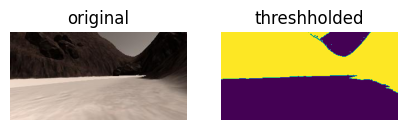

In [16]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2

path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])

fig = plt.figure(figsize= (5,5))

fig.add_subplot(2,2,1)
plt.imshow(image)
plt.axis('off')
plt.title("original")
#extracting rock and grid sample photos
example_grid = '../calibration_images/example_grid1.jpg'
example_rock = "../calibration_images/example_rock1.jpg"
grid_img = mpimg.imread(example_grid)
rock_img = mpimg.imread(example_rock)

#threshholding function for obstacles
def color_thresh(img, rgb_thresh=(120,120,120)):
    color_select = np.zeros_like(img[:,:,1])
    above_thresh = (img[:,:,0] < rgb_thresh[0]) &(img[:,:,1] < rgb_thresh[1]) &(img[:,:,2] < rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select

fig.add_subplot(2,2,2)

plt.imshow(color_thresh(image))
plt.axis('off')
plt.title("threshholded")

# 1 The next plots show the original and the threshholded images
# 2 The threshhold used here is for detecting the collectable rocks
# 3 The rocks are represented in yellow
# 4 The example rock image is used here not a random image for the sake of consistency 

Text(0.5, 1.0, 'original')

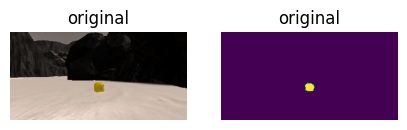

In [23]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2

#extracting rock sample photos
example_rock = "../calibration_images/example_rock1.jpg"
rock_img = mpimg.imread(example_rock)

fig = plt.figure(figsize= (5,5))

fig.add_subplot(2,2,1)
plt.imshow(rock_img)
plt.axis('off')
plt.title("original")

#threshholding function for rock samples
def color_thresh(img, rgb_thresh=(100,100,20)):
    color_select = np.zeros_like(img[:,:,1])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) &(img[:,:,1] > rgb_thresh[1]) &(img[:,:,2] < rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select

fig.add_subplot(2,2,2)

plt.imshow(color_thresh(rock_img))
plt.axis('off')
plt.title("original")

# 1 The next plots show the warped threshholded images for navigable terrain
# 2 The arrow represents the moving direction of the rover

/tmp/ipykernel_30320/371873062.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
/tmp/ipykernel_30320/371873062.py:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)


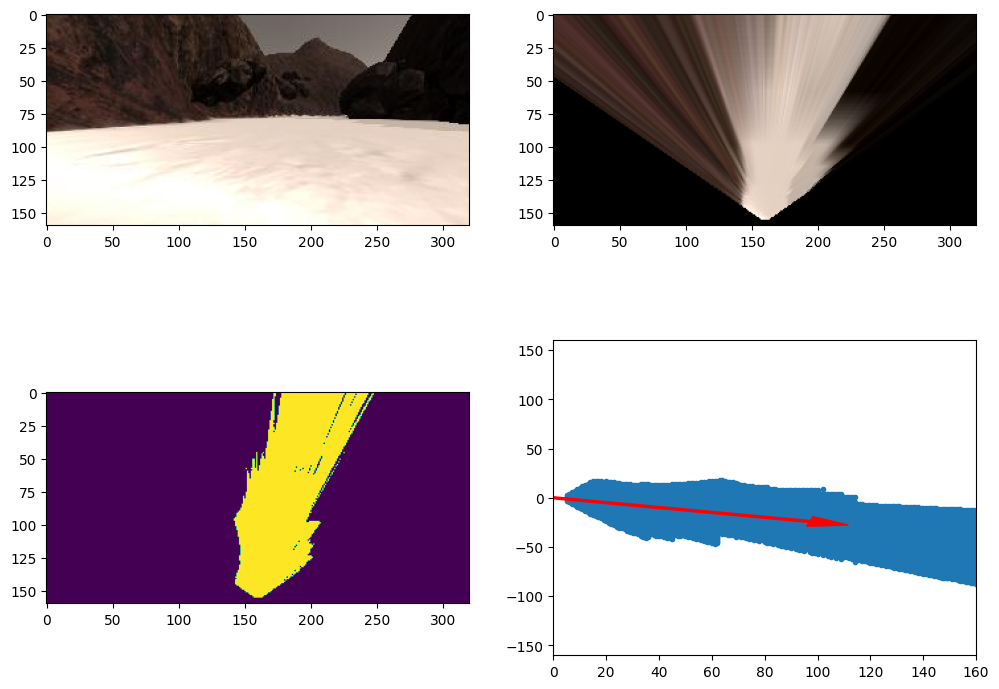

In [30]:
#Grabbing random images
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc
import glob2
import imageio
import glob2

# Define a function to convert from image coords to rover coords
def rover_coords(binary_img):
    # Identify nonzero pixels
    ypos, xpos = binary_img.nonzero()
    # Calculate pixel positions with reference to the rover position being at the 
    # center bottom of the image.  
    x_pixel = -(ypos - binary_img.shape[0]).astype(np.float)
    y_pixel = -(xpos - binary_img.shape[1]/2 ).astype(np.float)
    return x_pixel, y_pixel


# Define a function to convert to radial coords in rover space
def to_polar_coords(x_pixel, y_pixel):
    # Convert (x_pixel, y_pixel) to (distance, angle) 
    # in polar coordinates in rover space
    # Calculate distance to each pixel
    dist = np.sqrt(x_pixel**2 + y_pixel**2)
    # Calculate angle away from vertical for each pixel
    angles = np.arctan2(y_pixel, x_pixel)
    return dist, angles

# Define a function to map rover space pixels to world space
def rotate_pix(xpix, ypix, yaw):
    # Convert yaw to radians
    yaw_rad = yaw * np.pi / 180
    xpix_rotated = (xpix * np.cos(yaw_rad)) - (ypix * np.sin(yaw_rad))
                            
    ypix_rotated = (xpix * np.sin(yaw_rad)) + (ypix * np.cos(yaw_rad))
    # Return the result  
    return xpix_rotated, ypix_rotated

def perspect_transform(img, src, dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    return warped
    
#applying the image warp
dst_size = 3
bottom_offset = 5
source = np.float32([[14,140],
                    [300,140],
                    [200,95],
                    [120,95]])

destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                         [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                         [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset]])

#grabing random images
path = '../test_dataset/IMG/*'
img_list = glob2.glob(path)
index = np.random.randint(0,len(img_list)-1)
image = mpimg.imread(img_list[index])

#threshholding function for navigable terrain
def color_thresh(img, rgb_thresh=(160,160,160)):
    color_select = np.zeros_like(img[:,:,1])
    above_thresh = (img[:,:,0] > rgb_thresh[0]) &(img[:,:,1] > rgb_thresh[1]) &(img[:,:,2] > rgb_thresh[2])
    color_select[above_thresh] = 1
    return color_select

#applying img warp and threshhold
warped = perspect_transform(image, source, destination)
threshed = color_thresh(warped)

#performing pixel values in rover-centric coords
x,y = rover_coords(threshed)
dist, angles = to_polar_coords(x,y)
mean_dir = np.mean(angles)

fig = plt.figure(figsize=(12,9))

plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(warped)
plt.subplot(223)
plt.imshow(threshed)
plt.subplot(224)
plt.plot(x,y,'.')
plt.ylim(-160, 160)
plt.xlim(0, 160)
arrow_length = 100
x_arrow = arrow_length*np.cos(mean_dir)
y_arrow = arrow_length*np.sin(mean_dir)
plt.arrow(0, 0, x_arrow, y_arrow, color = 'red',zorder = 2,head_width = 10, width = 2)